## 最小二乘法

### 1.生成数据

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
x = np.array([np.linspace(0.01,1,100),
              np.square(np.linspace(0.01,1,100))]).T
w = np.ones((2,1))
b = 1
y = np.dot(x,w) + b + 0.01*np.random.randn(100,1)     #加上服从正态分布的扰动，生成随机数据

### 2.求解w 

#### (1)用推导出的公式求解w参数

$w = (X^TX)^{-1}X^TY$

In [11]:
x1 = np.ones((100,1))
X = np.hstack([x,x1])   #水平拼接
Y = y

$Y = Xw$

In [12]:
w = np.linalg.inv(np.dot(X.T,X)).dot(np.dot(X.T,Y))  #推导出的公式
print("w is {}".format(w))  #这里的w是将b合并了，即w = [w1,w2,b]

w is [[1.0277462 ]
 [0.97806751]
 [0.99407405]]


#### (2)用梯度下降法求解w参数

In [13]:
#梯度下降
w = 0.01*np.random.rand(3,1)  #初始化w
l_r = 0.001                   #初始化学习率
delta_w = np.dot(X.T,Y) - np.dot(X.T,X).dot(w) #求梯度
new_w = w + l_r*delta_w       #更新w参数
new_w

array([[0.11275297],
       [0.08612334],
       [0.18778749]])

In [15]:
loss= []   #用于存放每次更新求出的损失值
for i in range(1000):  #最多迭代1000次
    a = [0]*1000       
    a[i] = np.sum((Y.T - np.dot(X,new_w).T)**2)  #求损失
    loss.append(a[i])  #记录每次的损失
    if a[i] < 0.01:     #判断是否到达设定的阈值
        break          #达到阈值则结束循环
    else:               #否则更新参数
        w = new_w
        delta_w = np.dot(X.T,Y) - np.dot(X.T,X).dot(w)
        new_w = w + l_r*delta_w
print("w is {}".format(new_w))  #显示最后求出的参数

w is [[1.0592549 ]
 [0.9479569 ]
 [0.98833484]]


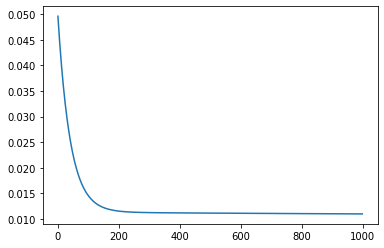

In [16]:
plt.plot(loss)    #画出损失值的变化图像